In [48]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D

In [8]:
#my code
v = np.array([5,2])
lamda = 1
A = np.array([[1,0],[0,1]]) * lamda
print(np.matmul(A, v))
print(lamda * v)

[5 2]
[5 2]



---
# VIDEO: Finding eigenvalues
---


[-1.  6.]


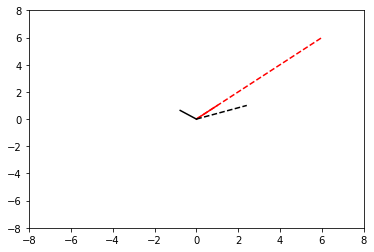

In [21]:
# matrix
A = [ [1,5], [2,4] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that with the above syntax, the eigenvalues are in the first element of eigvals:
print(eigvals[0])


# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector!
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2


# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()


In [24]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]


In [27]:
#code challenge
A = np.diag([2,3,-1])
eigvals = np.linalg.eig(A)[0]
print("A")
print(A)
print("eigenvalues for diagonal matrix")
print(eigvals)
A = np.diag([-2, -3, 1])
print(np.linalg.eig(A)[0])
A = np.triu(np.array(np.random.randn(4,4)))
eigvals = np.linalg.eig(A)[0]
print("A")
print(A)
print("eigenvalues for upper triangular matrix")
print(eigvals)
A = np.array([[2, 0, 0], [1, 3, 0], [6, 4, -1]])
A = np.tril(np.array(np.random.randn(4,4)))
eigvals = np.linalg.eig(A)[0]
print("A")
print(A)
print("eigenvalues for lower triangular matrix")
print(eigvals)

#conclusion: for a diagoanal or upper or lower triangular matrix, eigenvalues are equal to diagonal values

A
[[ 2  0  0]
 [ 0  3  0]
 [ 0  0 -1]]
eigenvalues for diagonal matrix
[ 2.  3. -1.]
[-2. -3.  1.]
A
[[-0.07822738  0.30403537  0.91192364  0.70774198]
 [ 0.          0.96243793 -0.02832814  0.57298069]
 [ 0.          0.          0.079125   -0.94650686]
 [ 0.          0.          0.          0.34627792]]
eigenvalues for upper triangular matrix
[-0.07822738  0.96243793  0.079125    0.34627792]
A
[[ 1.34113378  0.          0.          0.        ]
 [ 0.33081408 -0.19890744  0.          0.        ]
 [ 1.66495686  0.14995462  0.06331062  0.        ]
 [-0.0227711   0.39585366  0.01167845  1.27414898]]
eigenvalues for lower triangular matrix
[ 1.27414898  0.06331062 -0.19890744  1.34113378]


[ 17.455445   +0.        j  15.86268862 +5.78017721j
  15.86268862 -5.78017721j  16.7711491  +1.02837795j
  16.7711491  -1.02837795j  12.57713708+10.6114562 j
  12.57713708-10.6114562 j   8.34838802+14.6203054 j
   8.34838802-14.6203054 j -10.04130114+14.22075734j
 -10.04130114-14.22075734j   5.08210508+15.69658594j
   5.08210508-15.69658594j -13.02391117+10.8452653 j
 -13.02391117-10.8452653 j   0.7047244 +16.55698777j
   0.7047244 -16.55698777j  -4.14033091+16.17802093j
  -4.14033091-16.17802093j  -7.39846941+15.04854415j
  -7.39846941-15.04854415j  -5.30506674+15.73898482j
  -5.30506674-15.73898482j -16.81489076 +0.        j
 -16.00629235 +5.53414521j]


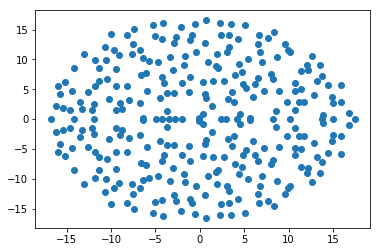

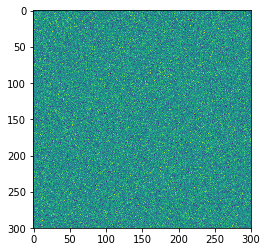

In [38]:
#code challenge: generate largish matrix of random numbers and examine eigenvalues
np.random.seed(1)
m = 300
A = np.array(np.random.randn(m, m))
eigvals = np.linalg.eig(A)[0]
print(eigvals[0:25])
#conclusion: many (most!) of the eigenvalues are complex numbers, representing non-real solutions
plt.scatter(eigvals.real, eigvals.imag)
plt.show()

plt.imshow(A)
plt.show()



---
# VIDEO: Finding eigenvectors
---


[ 3. -1.]
1.0 1.0


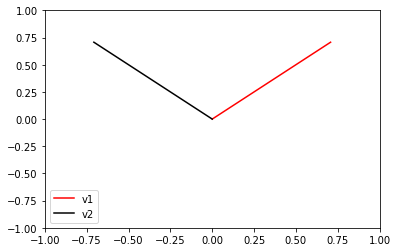

In [37]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals,evecs = np.linalg.eig(A)
print(evals) # could be in a different order compared to MATLAB output...

# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()

In [74]:
#my take
#NOTE first that np.linalg.eig returns the eigenvectors as *column* vectors
#So if there are three returned, the first is the values in the first *column* not *row*
A = np.array([[1,2],[2,1]])
eigvals, eigvecs = np.linalg.eig(A)
print("eigenvalues")
print(eigvecs)
print("eigenvectors (arranged by column)")
print(eigvals)
#conclusion: the eigenvector for an eigenvalue is in fact an infinite number of vectors
#that map to the null space of the shifted matrix.
#You can scale it however you like. Here, numpy returns 2^0.5 for both values in the eigenvector.
#It could be 1,1 or -5,-5
#Example
print("By-the-book matrix * eigenvector")
print(np.matmul(A, eigvecs[:,0]))
print("By-the-book eigenvalue * eigenvector")
print(eigvals[0] * eigvecs[:,0])
#Scale eigenvector for eigenvalue=3
print("Now scale eigenvector by random number")
scale = np.random.randn(1)
print(np.matmul(A, scale * eigvecs[:,0]))
print(eigvals[0] * scale * eigvecs[:,0])
print("Now scale eigenvector by -randomnuber")
print(np.matmul(A, -scale * eigvecs[:,0]))
print(eigvals[0] * -scale * eigvecs[:,0])

eigenvalues
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
eigenvectors (arranged by column)
[ 3. -1.]
By-the-book matrix * eigenvector
[2.12132034 2.12132034]
By-the-book eigenvalue * eigenvector
[2.12132034 2.12132034]
Now scale eigenvector by random number
[-2.56318588 -2.56318588]
[-2.56318588 -2.56318588]
Now scale eigenvector by -randomnuber
[2.56318588 2.56318588]
[2.56318588 2.56318588]
[ 3. -1.]




---
# VIDEO: Matrix powers via diagonalization
---


In [45]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print( np.linalg.matrix_power(A,3) ) # A*A*A

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V) )

[[ 0.05002486  0.02111072]
 [ 0.1240558   0.05237764]]
[[ 0.05002486  0.02111072]
 [ 0.1240558   0.05237764]]


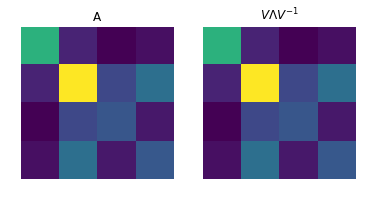

Reconstruction RMS: 1.36085587243e-13


In [64]:
## eigendecomposition of A and A^N

# make a symmetric matrix
A = np.round(10*np.random.randn(4,4))
A = np.matrix.transpose(A)@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)


# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (due to inverse numerical inaccuracies)
rmsA = np.sqrt( np.square(np.mean( np.reshape(recondiff,(1,-1)) )) )
print('Reconstruction RMS:', rmsA)


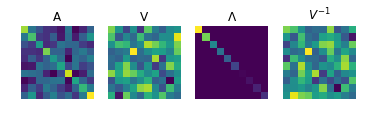

In [73]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

[[ 0.58287229  0.79893687  0.14818832]
 [ 0.61253695 -0.31218929 -0.72617927]
 [ 0.53390859 -0.5140406   0.67134484]] [[-0.58287229 -0.79893687  0.14818832]
 [-0.61253695  0.31218929 -0.72617927]
 [-0.53390859  0.5140406   0.67134484]]


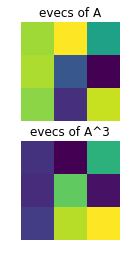

In [97]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig( A@A@A )

print(V,V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

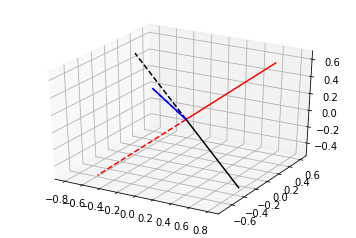

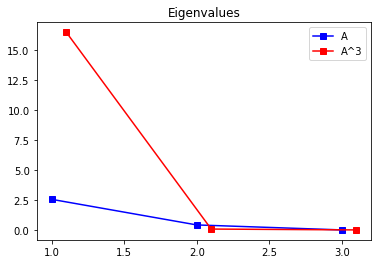

In [99]:
## plot the eigenvectors and eigenvalues

fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()


---
# VIDEO: Eigenvectors of repeated eigenvalues
---


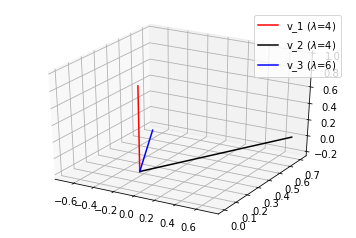

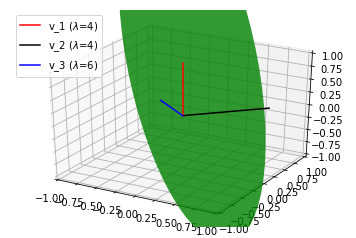

In [51]:
### Note about this cell: you need first to run the following cell, then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i=np.argsort(D)
D = D[i]
V = V[:,i]


## plot eigenvectors
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()


In [47]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mp\ot3d import Axes3D

In [49]:
#code challenge
#the trace of a square matrix is equal to the sum of its eigenvalues
#the determinant of a matrix is equal to the product of its eigenvalues
np.random.seed(1)
A = np.array(np.round(np.random.randn(10,10)*100))
print("A")
print(A)
print("rank of A")
print(np.linalg.matrix_rank(A))
eigvals = np.linalg.eig(A)[0]
print("eigenvalues of A")
print(eigvals)
print("trace of A")
print(np.trace(A))
print("sum of eigenvalues of A")
print(np.sum(eigvals))
print("determinant of A")
print(np.linalg.det(A))
print("product of eigenvalues of A")
print(np.prod(eigvals))

#now do it again with a reduced-rank square matrix
#NOTE: I did this by making a square matrix linearly dependent
#However, the product of the eigenvalues is not equal to the detemrinant in this case
#I think this is due to numeric instability
A = np.array(np.round(np.random.randn(10,10)*100))
A[:,0] = A[:,1]
print("A")
print(A)
print("rank of A")
print(np.linalg.matrix_rank(A))
eigvals = np.linalg.eig(A)[0]
print("eigenvalues of A")
print(eigvals)
print("trace of A")
print(np.trace(A))
print("sum of eigenvalues of A")
print(np.sum(eigvals))
print("determinant of A")
print(np.linalg.det(A))
#the scipy version of det is accurate!
print(linalg.det(A))
sign,logdet = np.linalg.slogdet(A)
print(sign*np.exp(logdet))
print("product of eigenvalues of A")
print(np.prod(eigvals))

#Now make reduced-rank matrix by making it a tall matrix
print("\n--------------\nReduced rank from 9x6 * 6x9 matrix")
#A = np.matmul(np.array(np.random.randn(9,6)),
#    np.array(np.random.randn(6,9)))
A = np.matmul(np.round(np.array(np.random.randn(9,6)*10)),
    np.round(np.array(np.random.randn(6,9))*10))
print("A")
print(A)
print("rank of A")
print(np.linalg.matrix_rank(A))
eigvals = np.linalg.eig(A)[0]
print("eigenvalues of A")
print(eigvals)
print("trace of A")
print(np.trace(A))
print("sum of eigenvalues of A")
print(np.sum(eigvals))
print("determinant of A")
print(np.linalg.det(A))
print("product of eigenvalues of A")
print(np.prod(eigvals))


A
[[ 162.  -61.  -53. -107.   87. -230.  174.  -76.   32.  -25.]
 [ 146. -206.  -32.  -38.  113. -110.  -17.  -88.    4.   58.]
 [-110.  114.   90.   50.   90.  -68.  -12.  -94.  -27.   53.]
 [ -69.  -40.  -69.  -85.  -67.   -1. -112.   23.  166.   74.]
 [ -19.  -89.  -75.  169.    5.  -64.   19.  210.   12.   62.]
 [  30.  -35. -114.  -35.  -21.   59.   84.   93.   29.   89.]
 [ -75.  125.   51.  -30.   49.   -8.  113.  152.  219. -140.]
 [-144.  -50.   16.   88.   32. -202.  -31.   83.   23.   76.]
 [ -22.  -20.   19.   41.   20.   12.  -67.   38.   12.  113.]
 [ 120.   19.  -38.  -64.   42.    8.  -34.    4.  -62.   70.]]
rank of A
10
eigenvalues of A
[ 217.70989015+259.91742259j  217.70989015-259.91742259j
  114.77763724+140.15740536j  114.77763724-140.15740536j
   98.76010513  +0.        j   14.21490717+109.6274111 j
   14.21490717-109.6274111 j -135.95456703 +73.75096802j
 -135.95456703 -73.75096802j -217.25584019  +0.        j]
trace of A
303.0
sum of eigenvalues of A
(302.99999